## EC7212 – Computer Vision and Image Processing

### 1. Add Gaussian Noise and Apply Otsu’s Algorithm

#### Step 1: Create the Image

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = np.ones((100, 100), dtype=np.uint8) * 50

cv2.rectangle(img, (20, 20), (50, 80), 120, -1)
cv2.rectangle(img, (60, 30), (90, 70), 200, -1)
cv2.imwrite('original_objects.png', img)


True

#### Step 2: Add Gaussian Noise

In [19]:
def add_gaussian_noise(image, mean=0, std=25):
    noise = np.random.normal(mean, std, image.shape).astype(np.int16)
    noisy_img = image.astype(np.int16) + noise
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    return noisy_img

noisy_img = add_gaussian_noise(img, mean=0, std=25)
cv2.imwrite('noisy_image.png', noisy_img)


True

#### Step 3: Apply Otsu’s Thresholding

In [20]:
_, otsu_mask = cv2.threshold(noisy_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imwrite('otsu_result.png', otsu_mask)

True

#### Step 4: Visualize the result

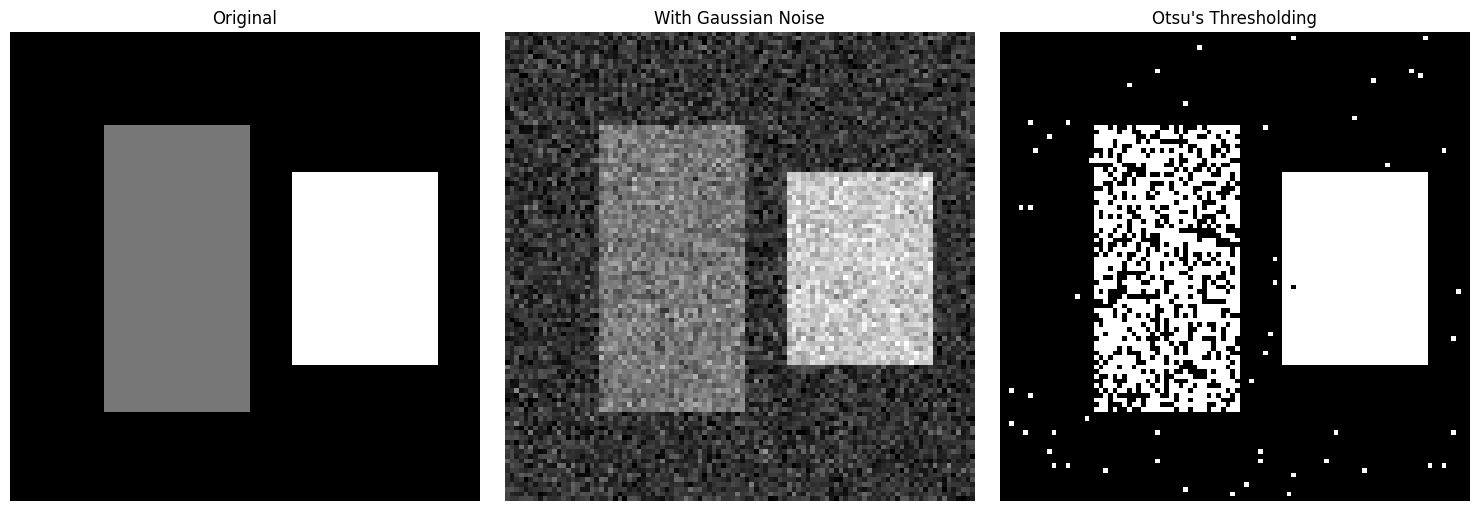

In [21]:
original = cv2.imread('original_objects.png', cv2.IMREAD_GRAYSCALE)
noisy = cv2.imread('noisy_image.png', cv2.IMREAD_GRAYSCALE)
otsu = cv2.imread('otsu_result.png', cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(original, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(noisy, cmap='gray')
axes[1].set_title('With Gaussian Noise')
axes[1].axis('off')

axes[2].imshow(otsu, cmap='gray')
axes[2].set_title("Otsu's Thresholding")
axes[2].axis('off')

plt.tight_layout()
plt.show()

### 2. Region Growing Image Segmentation

#### Step 1: Region Growing Function

In [22]:
import numpy as np
import cv2

def region_growing(img, seed, threshold=10):
    h, w = img.shape
    mask = np.zeros((h, w), np.uint8)
    mask[seed] = 255
    region_mean = int(img[seed])
    region_size = 1
    to_check = [seed]
    while to_check:
        x, y = to_check.pop()
        for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
            nx, ny = x+dx, y+dy
            if 0 <= nx < h and 0 <= ny < w and mask[nx, ny] == 0:
                if abs(int(img[nx, ny]) - region_mean) < threshold:
                    mask[nx, ny] = 255
                    to_check.append((nx, ny))
                    region_mean = (region_mean * region_size + int(img[nx, ny])) // (region_size + 1)
                    region_size += 1
    return mask

seed_point = (25, 25)
region_mask = region_growing(noisy_img, seed_point, threshold=20)
cv2.imwrite('region_growing_result.png', region_mask)

True

#### Step 2: Visualize the Result

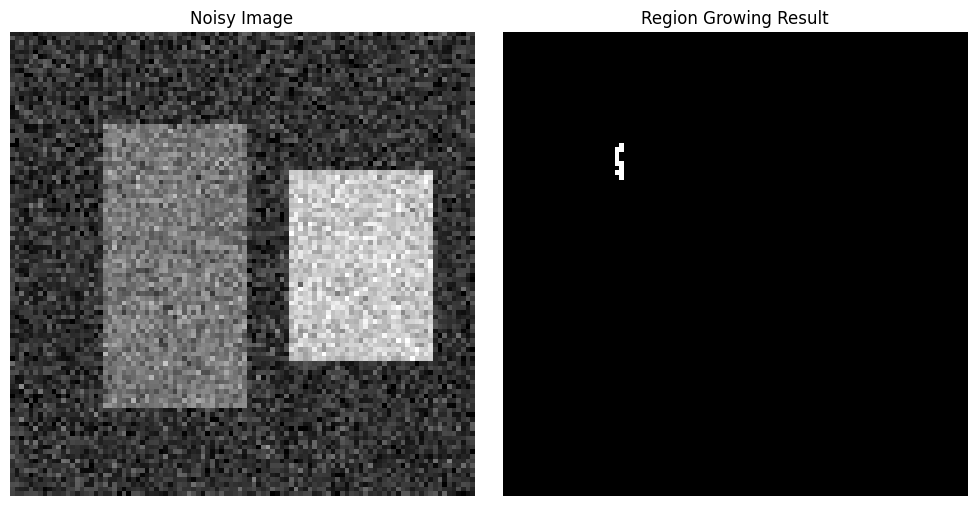

In [23]:
region = cv2.imread('region_growing_result.png', cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(noisy, cmap='gray')
axes[0].set_title('Noisy Image')
axes[0].axis('off')

axes[1].imshow(region, cmap='gray')
axes[1].set_title('Region Growing Result')
axes[1].axis('off')

plt.tight_layout()
plt.show()